# Assignment 3
Anuj Jagannath Said <br>
Roll number : ME21B172

In [82]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [83]:
df = pd.read_csv('Assignment3.csv')
data = df.to_numpy()
print(data.shape)
N = len(data[:,0])
ratio = 0.8
X_train = data[:round(ratio*N),:5]
y_train = data[:round(ratio*N),5]
X_test = data[round(ratio*N):,:5]
y_test = data[round(ratio*N):,5]

(101, 6)


In [84]:
# Training
reg = LinearRegression(fit_intercept=True).fit(X_train, y_train)
weights  = np.transpose(reg.coef_.reshape(1,-1))
# print(weights.shape)
# print(X_train.shape)
y_predicted_train = np.matmul(X_train,weights).reshape(-1) + reg.intercept_
mse = (np.matmul(y_train-y_predicted_train,np.transpose(y_train-y_predicted_train))/len(y_train))**.5
print("RMSE error while training using OLS:")
print(mse)
print("Values of weights while training using OLS:")
print(weights)

RMSE error while training using OLS:
20.821376861817605
Values of weights while training using OLS:
[[-1.99559835e+03]
 [ 1.51014610e-01]
 [-2.70461141e-02]
 [ 3.52854373e+02]
 [ 1.75702535e+00]]


RMSE error while testing using OLS:
52.36447387683089
[[-1.99559835e+03]
 [ 1.51014610e-01]
 [-2.70461141e-02]
 [ 3.52854373e+02]
 [ 1.75702535e+00]]


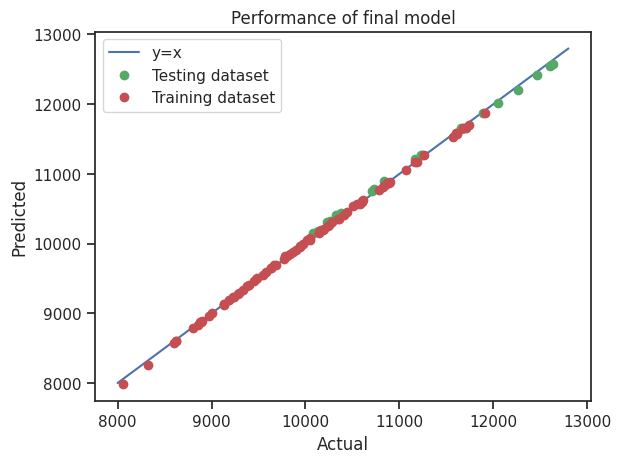

RMSE error while testing for model with transformed regressors:
52.36447387683089


In [85]:
# Testing
y_predicted_test = np.matmul(X_test,weights).reshape(-1) + reg.intercept_
mse  = (np.matmul(y_test-y_predicted_test,np.transpose(y_test-y_predicted_test))/ len(y_test))**.5
print("RMSE error while testing using OLS:")
print(mse)
print(weights)
plt.plot(np.arange(8000,12800),np.arange(8000,12800),color='b')
plt.plot(y_test,y_predicted_test,'o',color='g')
plt.plot(y_train,y_predicted_train,'o',color='r')
plt.legend(['y=x','Testing dataset','Training dataset'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Performance of final model')
plt.show()
print("RMSE error while testing for model with transformed regressors:")
print(mse)

##Performing EDA

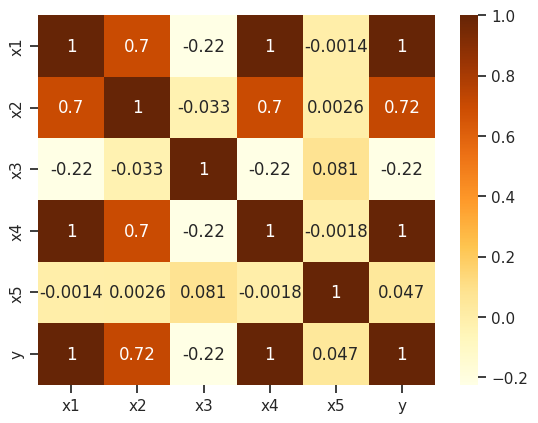

In [86]:
sns.color_palette("YlOrBr", as_cmap=True)
ax = sns.heatmap(df.corr(), annot=True,cmap="YlOrBr")

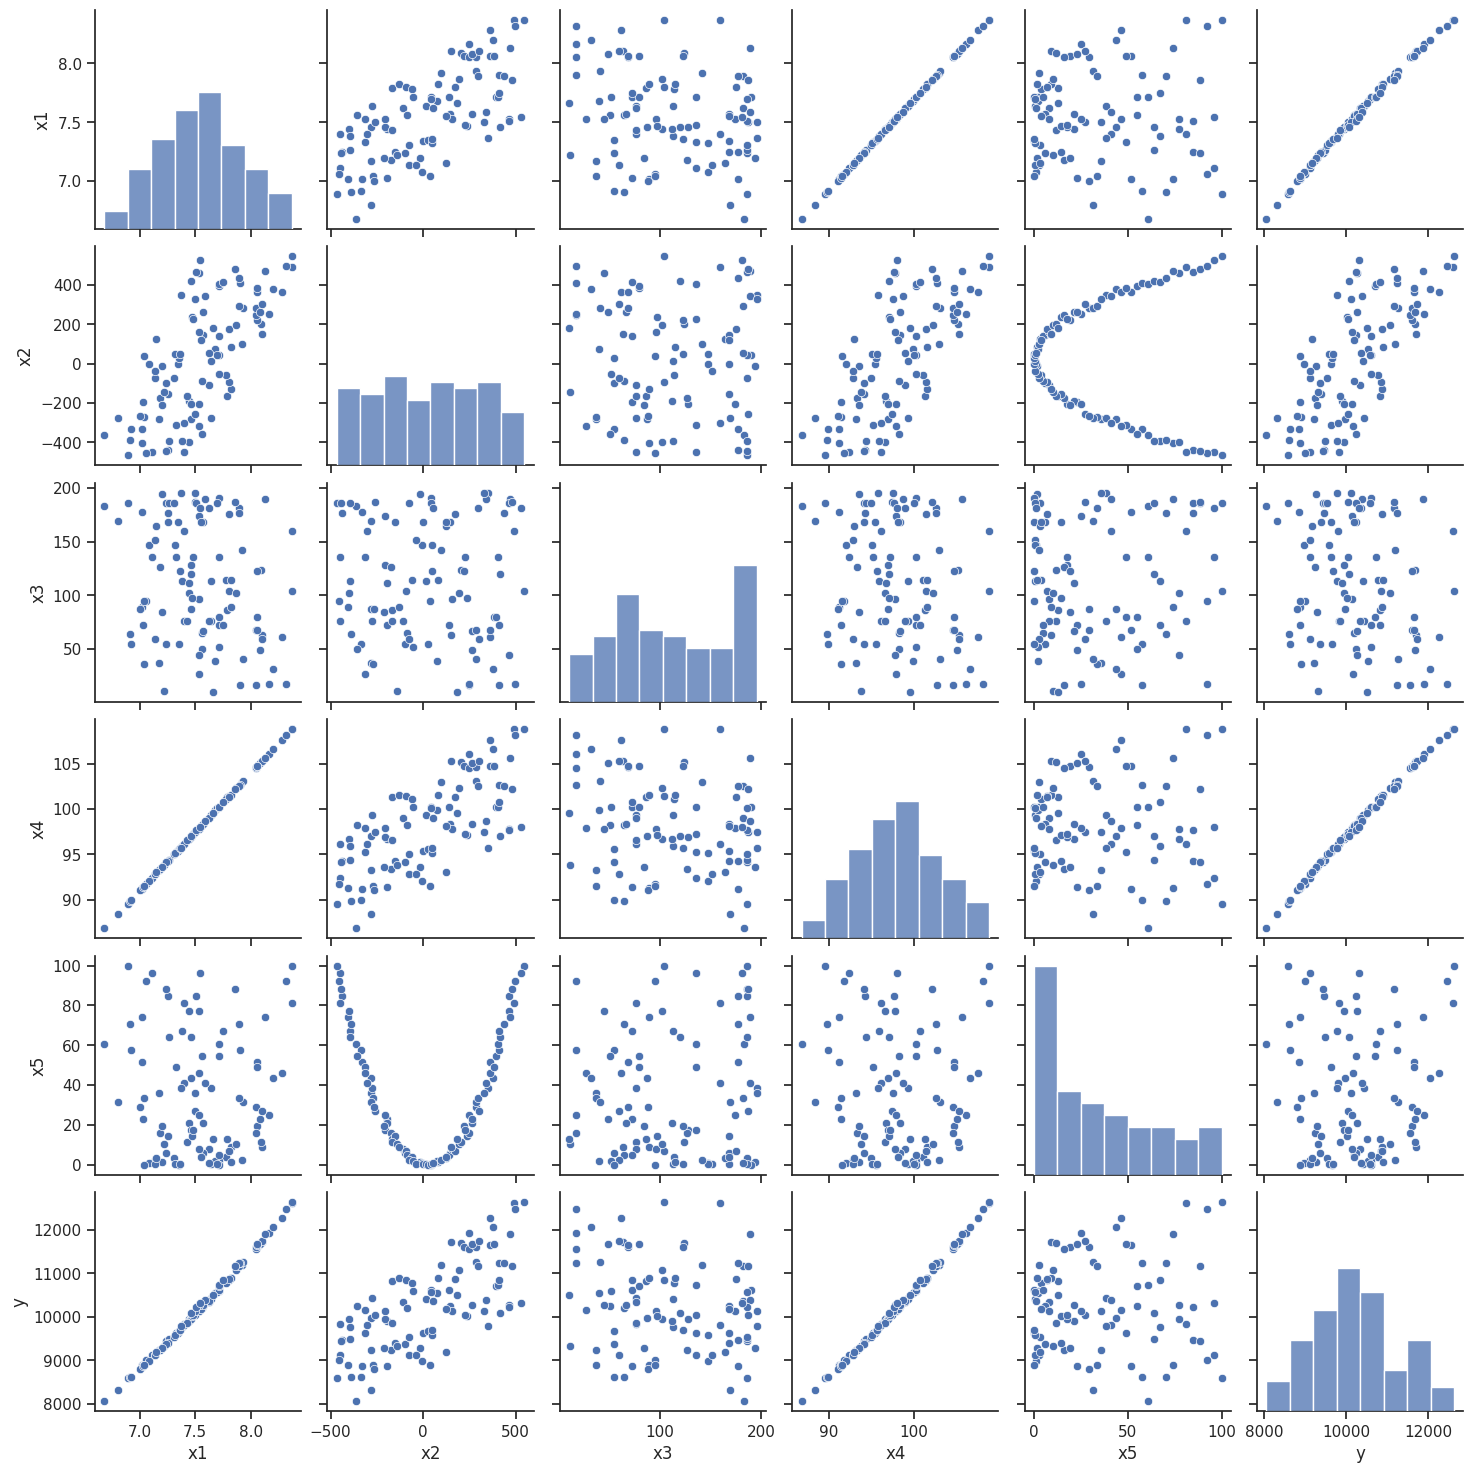

In [87]:
sns.set_theme(style="ticks", color_codes=True)
g = sns.pairplot(df)
plt.show()

Form the above plots it is clear that $x4$ feature is completely redundant (as $x1$ and $x4$ are highly correlated features so we won't gain anything new). Hence we need to transform $x4$ feature.<br>
Similarly, from the figure it seems that $x2$ and $x5$ are related, but linearly they aren't$;$ as a result we see the correlation coefficient near to 0 (hence we won't be able to say that $x5$ is redundant feature).
##Transforming the features.

In [88]:
print(np.corrcoef(y_train,X_train[:,3]**1))
print(np.corrcoef(y_train,X_train[:,3]**2))

[[1.         0.99901177]
 [0.99901177 1.        ]]
[[1.         0.99960522]
 [0.99960522 1.        ]]


From the adove correlation results it turns out that $x4^2$ is more correalted with $y$ than $x4$.<br>
Hence using the model as:<br>
$y = c1*x1 + c2*x2 + c3*x3 + c4*x4^2 + c5*x5 + c6,$<br>

In [89]:
X_tranformed = np.array([X_train[:,0],X_train[:,1],X_train[:,2],X_train[:,3]**2,X_train[:,4],np.ones(len(y_train))])
est = sm.OLS(y_train, np.transpose(X_tranformed))
est2 = est.fit()
print(est2.summary())
weights  = np.transpose(est2.params.reshape(1,-1))
weights.shape
y_predicted = np.matmul(np.transpose(X_tranformed),weights).reshape(-1)
mse  = (np.matmul(y_train-y_predicted,np.transpose(y_train-y_predicted))/len(y_train))**.5
print("RMSE error while training for model with transformed regressors:")
print(mse)
print(weights)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.976e+07
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          1.26e-234
Time:                        05:44:44   Log-Likelihood:                -78.818
No. Observations:                  81   AIC:                             169.6
Df Residuals:                      75   BIC:                             184.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            66.3271      8.026      8.264      0.0

From the summary we obtained, p-values of the $x3$ and $const$ features are beyond the threshold limit (< 0.05). Hence removing the $const$ and $x3$ feature we get,

In [90]:
X_tranformed = np.array([X_train[:,0],X_train[:,1],X_train[:,3]**2,X_train[:,4]])
est = sm.OLS(y_train, np.transpose(X_tranformed))
est2 = est.fit()
print(est2.summary())
weights  = np.transpose(est2.params.reshape(1,-1))
weights.shape
y_predicted = np.matmul(np.transpose(X_tranformed),weights).reshape(-1)
mse  = (np.matmul(y_train-y_predicted,np.transpose(y_train-y_predicted))/len(y_train))**.5
print("RMSE error while training for model with transformed regressors:")
print(mse)
print(weights)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.672e+09
Date:                Sun, 25 Aug 2024   Prob (F-statistic):                   5.88e-322
Time:                        05:44:45   Log-Likelihood:                         -79.364
No. Observations:                  81   AIC:                                      166.7
Df Residuals:                      77   BIC:                                      176.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

P-values for all features are within the threshold along with the Root mean-squared error as 0.6446. Also, the condition number has dropped by the factor of 100 indicating the slight increase in the numerical stability.<br>
Hence using the model as:<br>
$y = c1*x1 + c2*x2 + c4*x4^2 + c5*x5,$<br>

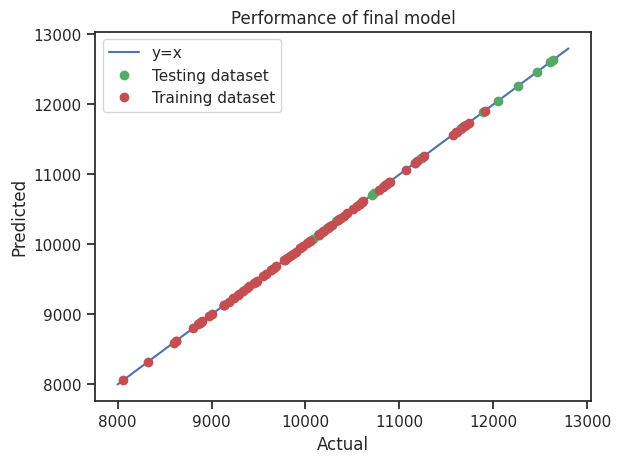

RMSE error while testing for model with transformed regressors:
0.8257895662283041


In [91]:
# Testing
X_tranformed_test = np.array([X_test[:,0],X_test[:,1],X_test[:,3]**2,X_test[:,4]])
y_predicted_test = np.matmul(np.transpose(X_tranformed_test),weights).reshape(-1)
mse  = (np.matmul(y_test-y_predicted_test,np.transpose(y_test-y_predicted_test))/ len(y_test))**.5
plt.plot(np.arange(8000,12800),np.arange(8000,12800),color='b')
plt.plot(y_test,y_predicted_test,'o',color='g')
plt.plot(y_train,y_predicted,'o',color='r')
plt.legend(['y=x','Testing dataset','Training dataset'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Performance of final model')
plt.show()
print("RMSE error while testing for model with transformed regressors:")
print(mse)

Comparision of initial model and the final model,

1.   Using Linear regression (without feature transformation)


>RMSE for initial model (training) = 20.821376861817605

>RMSE for initial model (testing) = 52.36447387683089

2.   Using Linear regression (with feature transformation)

>RMSE for initial model (training) = 0.6445964513579052

>RMSE for initial model (testing) = 0.8257895662283041


In [92]:
!pip install lazypredict
import lazypredict
from lazypredict.Supervised import LazyRegressor
regressor = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = regressor.fit(X_train, X_test, y_train, y_test)
print(models)

 74%|███████▍  | 31/42 [00:01<00:00, 24.35it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:02<00:00, 20.17it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 81, number of used features: 5
[LightGBM] [Info] Start training from score 10001.631655
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 